# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

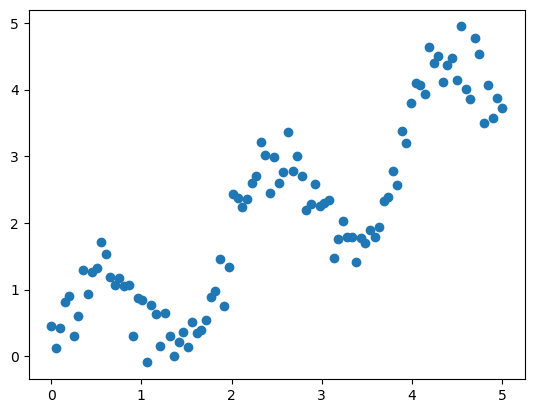

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5298891078023601


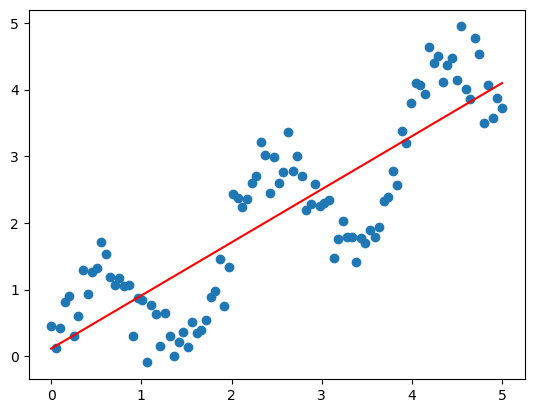

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [10]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [11]:
regr_poly = LinearRegression()

In [12]:
regr_poly.fit(X_poly, y)

LinearRegression()

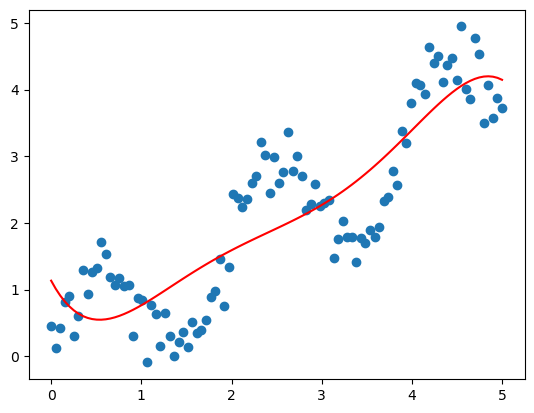

In [13]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [14]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.56261327  3.54046672 -1.67743416  0.35793661 -0.02774897]
interception:  1.1328537547060433


In [15]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.13285375, 1.01224595, 0.90843564, 0.82020874, 0.74640481,
       0.68591608, 0.63768624, 0.60070944, 0.57402916, 0.55673707,
       0.54797204, 0.54691893, 0.55280759, 0.5649117 , 0.58254772,
       0.60507377, 0.63188854, 0.66243022, 0.69617536, 0.7326378 ,
       0.77136762, 0.81194994, 0.85400394, 0.89718169, 0.94116708,
       0.98567473, 1.03044891, 1.07526239, 1.11991541, 1.16423456,
       1.20807166, 1.25130273, 1.29382682, 1.33556498, 1.37645911,
       1.41647092, 1.45558079, 1.4937867 , 1.53110316, 1.56756004,
       1.60320154, 1.63808511, 1.67228027, 1.70586762, 1.73893766,
       1.77158974, 1.80393098, 1.83607513, 1.86814151, 1.90025388,
       1.93253942, 1.96512753, 1.99814884, 2.03173404, 2.06601282,
       2.10111277, 2.13715829, 2.17426948, 2.21256107, 2.25214131,
       2.29311087, 2.33556176, 2.37957624, 2.42522569, 2.47256956,
       2.52165427, 2.57251207, 2.62516001, 2.67959879, 2.7358117 ,
       2.79376354, 2.85339946, 2.91464394, 2.97739965, 3.04154

In [16]:
regr_poly.predict(X_poly)

array([1.13285375, 1.01224595, 0.90843564, 0.82020874, 0.74640481,
       0.68591608, 0.63768624, 0.60070944, 0.57402916, 0.55673707,
       0.54797204, 0.54691893, 0.55280759, 0.5649117 , 0.58254772,
       0.60507377, 0.63188854, 0.66243022, 0.69617536, 0.7326378 ,
       0.77136762, 0.81194994, 0.85400394, 0.89718169, 0.94116708,
       0.98567473, 1.03044891, 1.07526239, 1.11991541, 1.16423456,
       1.20807166, 1.25130273, 1.29382682, 1.33556498, 1.37645911,
       1.41647092, 1.45558079, 1.4937867 , 1.53110316, 1.56756004,
       1.60320154, 1.63808511, 1.67228027, 1.70586762, 1.73893766,
       1.77158974, 1.80393098, 1.83607513, 1.86814151, 1.90025388,
       1.93253942, 1.96512753, 1.99814884, 2.03173404, 2.06601282,
       2.10111277, 2.13715829, 2.17426948, 2.21256107, 2.25214131,
       2.29311087, 2.33556176, 2.37957624, 2.42522569, 2.47256956,
       2.52165427, 2.57251207, 2.62516001, 2.67959879, 2.7358117 ,
       2.79376354, 2.85339946, 2.91464394, 2.97739965, 3.04154

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [17]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [18]:
sigma = 0.3

In [19]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [20]:
regr_rbf = LinearRegression()

In [21]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

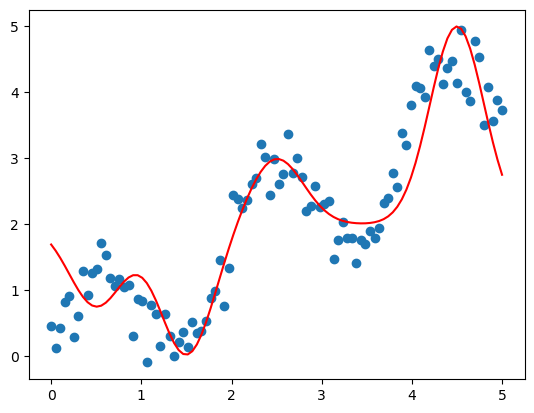

In [22]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [23]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.24413035 -1.97857811  0.99370181 -0.003523    2.99285141]
interception:  2.002515192037737


#### Comparison

In [24]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

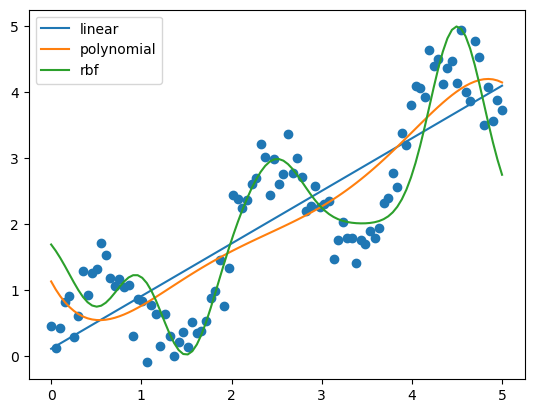

In [25]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [26]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5298891078023601


In [27]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4705380923247715


In [28]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2694246057690315
